# lista 3

## zadanie 1

In [68]:
from scipy.stats import uniform, gamma, expon
import scipy.special as ss, seaborn as sns
import random, matplotlib.pyplot as plt, numpy as np

In [2]:
n = 1000
pr = [0.11, 0.12, 0.27, 0.19, 0.31]
q = 1/5

In [3]:
c = max([pr[i]/q for i in range(len(pr))])

In [4]:
def akcodrz():
    u = random.random()
    y = random.randint(1,5)
    if u<pr[y-1]/(c*q):
        return y
    else:
        return akcodrz()

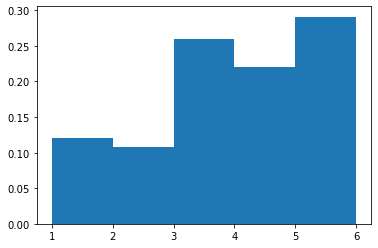

In [5]:
t=[akcodrz() for _ in range(n)]
plt.hist(t,density=True, bins=[1,2,3,4,5,6])
plt.show()

In [144]:
sr = sum(pr[i]*(i+1) for i in range(5)) 

In [146]:
print(sr, np.mean(t)) # nie wiem czemy numpy daje taki podejrzany wynik

3.47 0.4756797905282664


## zadanie 2

In [29]:
def f_gamma(x):
    return 1/16 * x**2 * np.exp(-x/2)

In [81]:
def F_gamma(x):
    return (16- 2*np.exp(-x/2)*(8+x*(4+x)))/16

In [53]:
def f_exp(x, lambd = 1/4):
    return lambd*np.exp(-lambd*x)

In [54]:
xs = np.linspace(0,50,5000)
m = max(f_gamma(i)/f_exp(i) for i in xs)

In [55]:
print(m)

2.165364445148121


In [112]:
def ao():
    y = np.random.exponential(4)
    u = np.random.rand()
    if u <= f_gamma(y)/(m*f_exp(y)):
        return y
    else:
        return ao()

In [113]:
t2=[ao() for _ in range(1,100000, 100)]

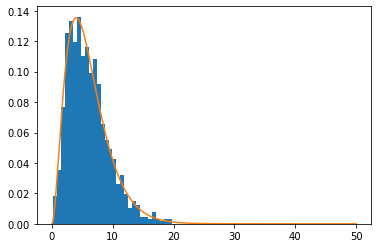

In [118]:
plt.hist(t2,density=True, bins=30)
plt.plot(xs, [f_gamma(x) for x in xs ])
plt.show()

In [121]:
def demp(X, x):
    n = len(X)
    count = sum(1 for xi in X if xi <= x)
    return count / n

def drewdemp(X): # dodana opcja porównania do tego zadania
    # X.append(1)
    x_values = np.linspace(0,30,1000)
    # y_values = [demp(t2, i) for i in t2]
    z_values = gamma.cdf(np.linspace(0,30,1000), a=3, scale = 2)
    sns.ecdfplot(data=X, label="empiryczna - ecdf", color="blue")
    # plt.plot(x_values, y_values, label='empiryczna - demp', color = 'orange', alpha=0.5)
    plt.plot(x_values, z_values, label = 'teoretyczna')
    plt.legend()
    plt.title('Dystrybuanta')
    plt.show()



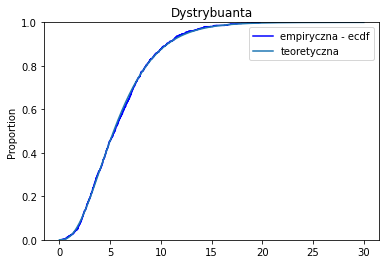

In [122]:
drewdemp(t2)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


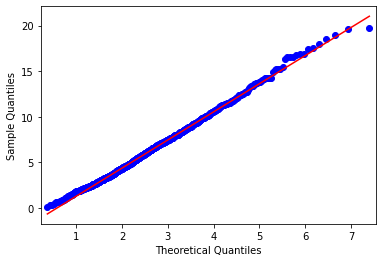

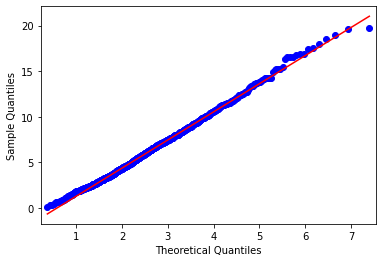

In [127]:
import statsmodels.api as sm
sm.qqplot(np.array(t2), dist=gamma, distargs=(5,), line='q', scale = 0.5)

In [139]:
def war_pr(X):
    n = len(X)
    return 1/(n-1)*sum((xi - sum(X)/n)**2 for xi in X)

def srednia(X):
    n = len(X)
    return sum(X)/n


In [142]:
print(war_pr(t2), 3*2**2)

11.42226051892061 12


In [143]:
print(srednia(t2), 2*3)

5.995808495336307 6
